In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18.0

In [14]:
df = pd.read_excel("gloss_data.ods", engine="odf")

In [15]:
df.head()

,Gloss,Text,Period,Genre,Location,Side,Column,Line
0,he-pi₂ eš-šu₂,11N-T4,Neo-Babylonian,Medical,Nippur,o,0,2
1,he-pi₂ eš-šu₂,11N-T4,Neo-Babylonian,Medical,Nippur,o,0,3
2,he-pi₂ eš-šu₂,11N-T4,Neo-Babylonian,Medical,Nippur,o,0,4
3,he-pi₂,AO 17602,Achaemenid,Lexical,Nippur,r,iii,36
4,he-pi₂,BM 121206,Neo-Assyrian,Incantation-Ritual,Assur,r,i,3’


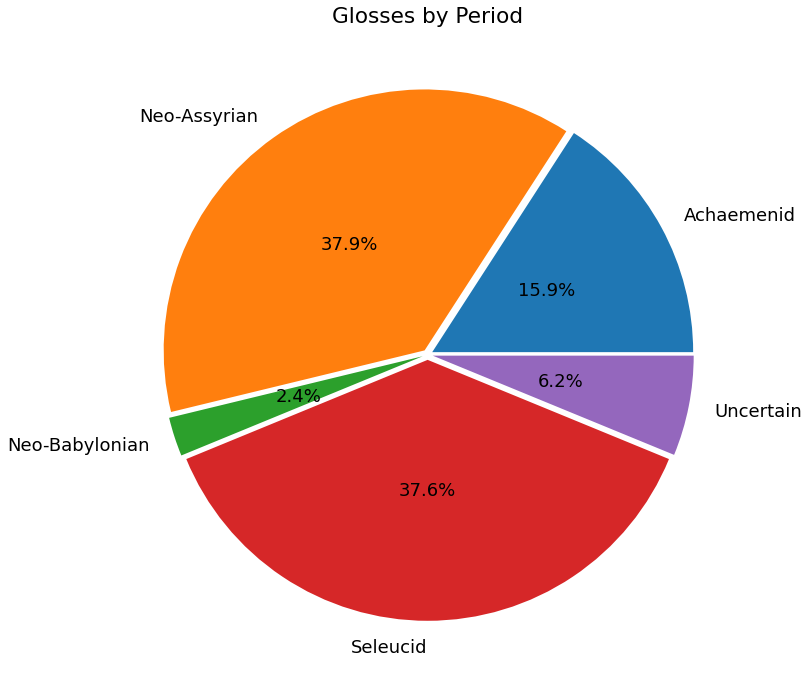

In [16]:
data = df.groupby(['Period']).size()
pie, ax = plt.subplots(figsize=[12,12])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*len(data), labels=labels, pctdistance=0.5)
plt.title("Glosses by Period")
pie.savefig("glosses_by_period.png")

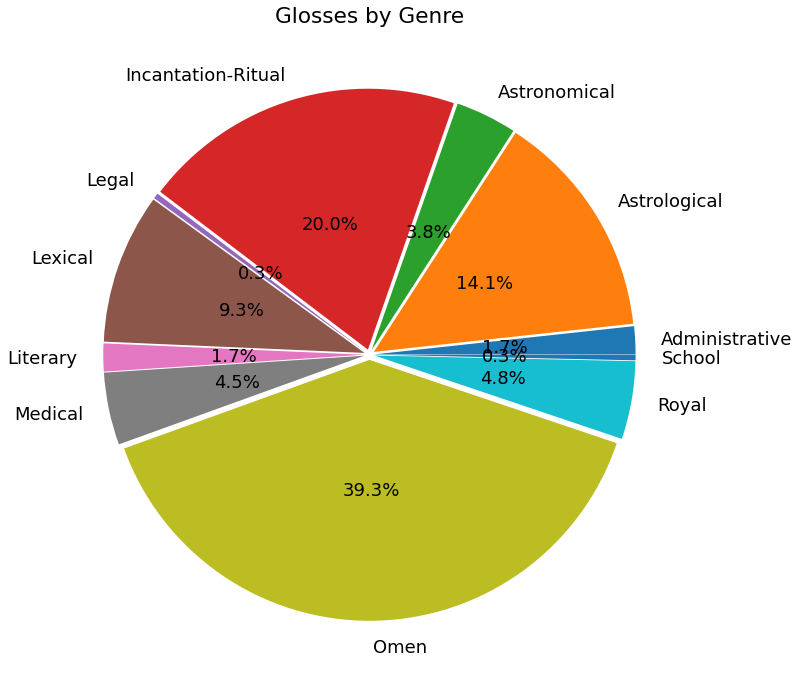

In [17]:
data = df.groupby(['Genre']).size()
pie, ax = plt.subplots(figsize=[12,12])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*len(data), labels=labels, pctdistance=0.5)
plt.title("Glosses by Genre")
pie.savefig("glosses_by_genre.png")

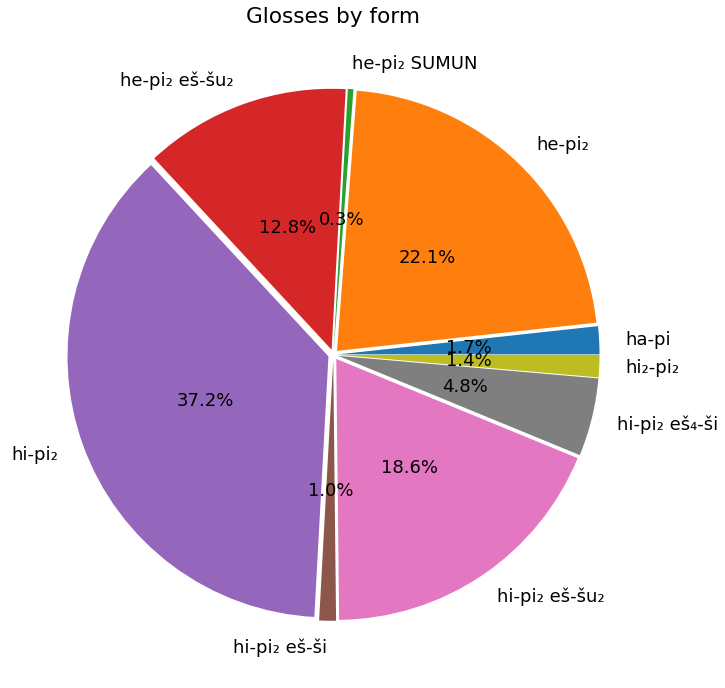

In [18]:
data = df.groupby(['Gloss']).size()
pie, ax = plt.subplots(figsize=[12,12])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*len(data), labels=labels, pctdistance=0.5)
plt.title("Glosses by form")
pie.savefig("glosses_by_form.png")

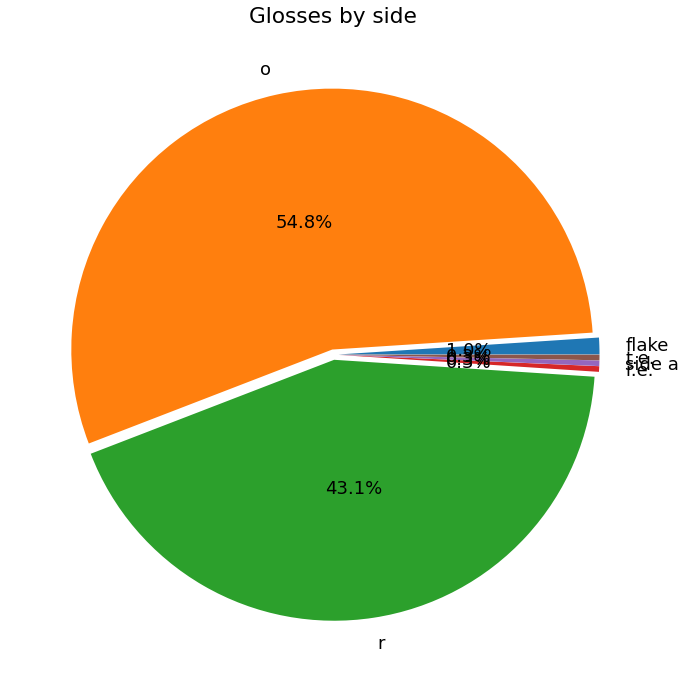

In [19]:
data = df.groupby(['Side']).size()
pie, ax = plt.subplots(figsize=[12,12])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*len(data), labels=labels, pctdistance=0.5)
plt.title("Glosses by side")
pie.savefig("glosses_by_side.png")

In [20]:
count_of_glosses = df.groupby(['Text']).size().reset_index(name='count')['count']
print("Overall:")
print("Median:", count_of_glosses.median())
print("Mean:", count_of_glosses.mean())
print("Max:", count_of_glosses.max())

Overall:
Median: 1.5
Mean: 3.2222222222222223
Max: 36


/home/willis/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


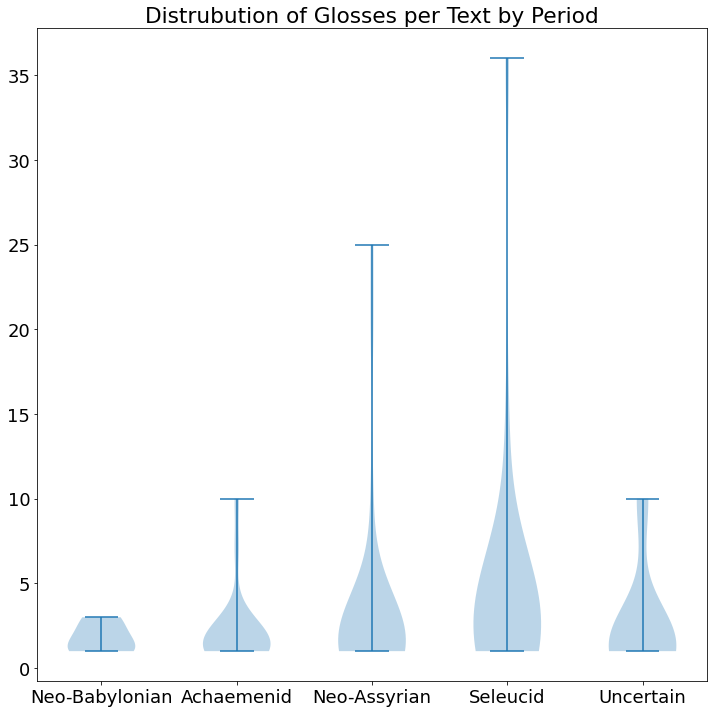

In [21]:
text_by_period = df.groupby(['Period', 'Text']).size().reset_index(name='count')
periods = df["Period"].unique()
data = []
for period in periods:
    period_count = text_by_period.loc[text_by_period['Period'] == period]['count']
    data.append(list(period_count))
fig, ax = plt.subplots(figsize=[12,12])
plt.violinplot(data)
ax.set_xticks(np.arange(1, len(periods)+1))
ax.set_xticklabels(periods)
plt.title("Distrubution of Glosses per Text by Period")
fig.savefig("distribution_of_glosses_by_period.png")

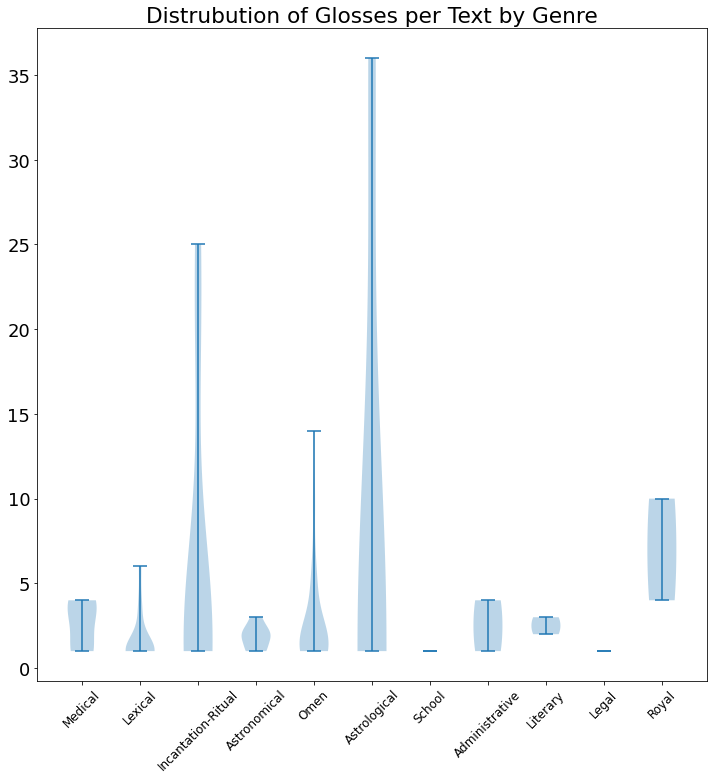

In [22]:
text_by_genre = df.groupby(['Genre', 'Text']).size().reset_index(name='count')
genres = df["Genre"].unique()
data = []
for genre in genres:
    genre_count = text_by_genre.loc[text_by_genre['Genre'] == genre]['count']
    data.append(list(genre_count))
fig, ax = plt.subplots(figsize=[12,12])
plt.violinplot(data)
ax.set_xticks(np.arange(1, len(genres)+1))
ax.set_xticklabels(genres, rotation=45, fontsize=12)
plt.title("Distrubution of Glosses per Text by Genre")
fig.savefig("distribution_of_glosses_by_genre.png")